In [1]:
import pandas as pd
import numpy as np

from wordcloud import WordCloud

import isodate
import ast
import re
from unidecode import unidecode

import emoji
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from keybert import KeyBERT
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from sentence_transformers import SentenceTransformer




# Import necessary libraries to visualize data
import matplotlib.pyplot as plt
import seaborn as sns


# Import necessary libraries for data selection
from sklearn.feature_selection import chi2

# Import library for data splitting
from sklearn.model_selection import train_test_split

# Import necessary libraries for data modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor, Pool
from catboost import EFstrType

from sklearn.metrics import make_scorer, r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
import shap

import requests
import os
from tqdm import tqdm
import cv2
import easyocr

In [33]:
df1 = pd.read_csv('20251130_include_thumbnail_programming_org.csv', parse_dates = ['fetching_date','channel_published_at'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2153 entries, 0 to 2152
Columns: 820 entries, fetching_date to thumbnail_text_area_ratio
dtypes: bool(2), datetime64[ns, UTC](1), datetime64[ns](1), float64(783), int64(13), object(20)
memory usage: 13.4+ MB


In [34]:
df2 = pd.read_csv('new_programming_org.csv', parse_dates=['fetching_date'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2408 entries, 0 to 2407
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   fetching_date         2408 non-null   datetime64[ns]
 1   trending_country      2408 non-null   object        
 2   video_id              2408 non-null   object        
 3   video_title           2408 non-null   object        
 4   video_published_at    2408 non-null   object        
 5   video_description     1770 non-null   object        
 6   channel_id            2408 non-null   object        
 7   channel_title         2408 non-null   object        
 8   tags                  2408 non-null   object        
 9   category_id           2408 non-null   int64         
 10  default_language      2408 non-null   object        
 11  duration              2408 non-null   object        
 12  dimension             2408 non-null   object        
 13  definition        

In [35]:
df2 = df2[['video_id','video_title','video_description','channel_title','channel_description']]
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2408 entries, 0 to 2407
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   video_id             2408 non-null   object
 1   video_title          2408 non-null   object
 2   video_description    1770 non-null   object
 3   channel_title        2408 non-null   object
 4   channel_description  2215 non-null   object
dtypes: object(5)
memory usage: 94.2+ KB


In [36]:
df = pd.merge(df1, df2, on='video_id', how='left')
df.head()

,fetching_date,trending_country,video_id,video_title_x,video_published_at,video_description_x,channel_id,channel_title_x,tags,category_id,...,engagement_rate,avg_weekly_posts,thumbnail_brightness,thumbnail_saturation,thumbnail_has_text,thumbnail_text_area_ratio,video_title_y,video_description_y,channel_title_y,channel_description_y
0,2025-11-09 10:47:38.100173,US,M0LFxguOVVQ,data structures vs algorithms explained in 30 ...,2025-09-25 12:30:24+00:00,join our live 4 month jobready bootcamps full ...,UCwr-evhuzGZgDFrq_1pLt_A,error makes clever,"['dsa', 'dsa alogorithm', 'tech explained']",27,...,0.058453,3.017587,88.647564,145.827373,NaN,0.022564,Data Structures vs Algorithms Explained in 30 ...,Join our Live 4 Month Job-Ready BOOTCAMPS: \n ...,Error Makes Clever,Empowering developers to level up their skills...
1,2025-11-09 10:47:38.100173,US,Lv8XpULy_uU,c language projects for beginners with source ...,2024-02-11 07:51:53+00:00,struggling with your college project facing ch...,UCZ-qVFZubQ-pVHc9SQ9HjzQ,codelopment,"['c projects with source code', 'c projects fo...",28,...,0.030853,4.360799,142.990718,196.335133,NaN,0.029809,C Language Projects for Beginners with SOURCE ...,Struggling with your college project? 👨‍💻🎓\nFa...,Codelopment,Welcome to Codelopment\n— Your Practical Codin...
2,2025-11-09 10:47:38.100173,US,e-VXwwStFSA,variables datatypes their rules syntax explain...,2023-01-23 20:13:14+00:00,unlock the secrets of c programming and take y...,UCNA-ztik6gAz9IXZNyAv2iQ,programming with daemon,"['C++ workshop', 'building apps', 'c++', 'codi...",27,...,0.187500,0.040628,139.769155,13.288831,NaN,0.098270,"Variables, datatypes their rules & syntax expl...","""Unlock the secrets of C++ programming and tak...",Programming With Daemon,Welcome to our programming channel! We are ded...
3,2025-11-09 10:47:38.100173,US,sas53ImpHds,programming with c and c paper 2024 mayjune bc...,2024-06-22 08:58:43+00:00,NaN,UCPPJY_aud3CaBsvIXDZ2Osg,batman,[],20,...,0.004026,0.053738,124.546777,10.312292,NaN,0.050966,programming with C and C++ paper 2024 may/June...,NaN,Batman,NaN
4,2025-11-09 10:47:38.100173,US,xeiO1tPfhoI,understanding oops,2024-12-06 12:30:52+00:00,join our live 4 month jobready bootcamps full ...,UCwr-evhuzGZgDFrq_1pLt_A,error makes clever,[],27,...,0.075436,3.017587,20.016788,142.259196,NaN,0.021551,Understanding Oops !,Join our Live 4 Month Job-Ready BOOTCAMPS: \n ...,Error Makes Clever,Empowering developers to level up their skills...


In [37]:
kw_model = KeyBERT(model='all-MiniLM-L6-v2')
def extract_keywords(text, kw_model=kw_model, top_n=2):
    if pd.isna(text) or text.strip() == '':
        return []
    keywords = kw_model.extract_keywords(text, top_n=top_n, stop_words='english')
    return [kw[0] for kw in keywords]
df['extracted_keywords'] = df['spacy_title'].apply(lambda x: extract_keywords(x, kw_model=kw_model, top_n=3))

In [7]:
df[['extracted_keywords','video_title_x']]

,extracted_keywords,video_title_x
0,"[dsa, algorithm, data]",data structures vs algorithms explained in 30 ...
1,"[code, language, project]",c language projects for beginners with source ...
2,"[datatype, syntax, variable]",variables datatypes their rules syntax explain...
3,"[bcom, program, application]",programming with c and c paper 2024 mayjune bc...
4,"[oop, understand]",understanding oops
...,...,...
2148,"[ai, artificialintelligence, agent]",ai agents explained in 60s simple concept anal...
2149,"[union, programming, sizeof]",c programming union concept sizeof question wi...
2150,"[conceptualcoding, programming, printf]",printf octal value imp concept clanguageinhind...
2151,"[programming, concept, structure]",to demonstrate the concept of structure in c p...


In [38]:
def normalize_text(text):
    if pd.isna(text):
        return ''
    
    # Convert to lowercase
    text = text.lower()
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    #  Remove Web links
    text = re.sub(r'http\S+|www\S+', '', text)
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

def additional_normalize_text(text):
    if pd.isna(text):
        return ''
    
    # Convert accented characters to their ASCII equivalents
    text = unidecode(text)
    # Remove special characters and punctuation
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    return text



def spcay_text(text):
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(text)
    # tokens = [token.lemma_ for token in doc if token.text not in STOP_WORDS and not token.is_punct]
    tokens = [token.lemma_ for token in doc if not token.is_punct]
    return ' '.join(tokens)


def normalize_text_columns(df, text_columns = ['video_title', 'video_description', 'channel_title', 'channel_description'], function=normalize_text):    
    for col in text_columns:
        df[col] = df[col].apply(function)
    return df

In [89]:
df.to_csv('text_feature_model2.csv', index=False)

In [39]:
dfo=df.copy()

In [133]:
df =dfo.copy()

In [40]:
df.shape

(2153, 824)

In [92]:
print(df.columns)

Index(['fetching_date', 'trending_country', 'video_id', 'video_title_x',
       'video_published_at', 'video_description_x', 'channel_id',
       'channel_title_x', 'tags', 'category_id',
       ...
       'engagement_rate', 'avg_weekly_posts', 'thumbnail_brightness',
       'thumbnail_saturation', 'thumbnail_has_text',
       'thumbnail_text_area_ratio', 'video_title_y', 'video_description_y',
       'channel_title_y', 'channel_description_y'],
      dtype='object', length=824)


In [41]:
metrics = ['video_view_count', 'video_like_count', 'video_comment_count','channel_view_count', 'subscriber_count']
for metric in metrics:
    df[f'{metric}_log'] = np.log1p(df[metric])
df.columns

Index(['fetching_date', 'trending_country', 'video_id', 'video_title_x',
       'video_published_at', 'video_description_x', 'channel_id',
       'channel_title_x', 'tags', 'category_id',
       ...
       'thumbnail_text_area_ratio', 'video_title_y', 'video_description_y',
       'channel_title_y', 'channel_description_y', 'video_view_count_log',
       'video_like_count_log', 'video_comment_count_log',
       'channel_view_count_log', 'subscriber_count_log'],
      dtype='object', length=829)

In [42]:
emb_cols = [col for col in df.columns if 'emb' in col]
len(emb_cols)

768

In [43]:
df_model = df.drop(columns=emb_cols)
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2153 entries, 0 to 2152
Data columns (total 61 columns):
 #   Column                               Non-Null Count  Dtype              
---  ------                               --------------  -----              
 0   fetching_date                        2153 non-null   datetime64[ns]     
 1   trending_country                     2153 non-null   object             
 2   video_id                             2153 non-null   object             
 3   video_title_x                        2153 non-null   object             
 4   video_published_at                   2153 non-null   object             
 5   video_description_x                  1585 non-null   object             
 6   channel_id                           2153 non-null   object             
 7   channel_title_x                      2153 non-null   object             
 8   tags                                 2153 non-null   object             
 9   category_id                   

In [44]:
df_model['video_description_y'] = df_model['video_description_y'].fillna('')
df_model['channel_description_y'] = df_model['channel_description_y'].fillna('')
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2153 entries, 0 to 2152
Data columns (total 61 columns):
 #   Column                               Non-Null Count  Dtype              
---  ------                               --------------  -----              
 0   fetching_date                        2153 non-null   datetime64[ns]     
 1   trending_country                     2153 non-null   object             
 2   video_id                             2153 non-null   object             
 3   video_title_x                        2153 non-null   object             
 4   video_published_at                   2153 non-null   object             
 5   video_description_x                  1585 non-null   object             
 6   channel_id                           2153 non-null   object             
 7   channel_title_x                      2153 non-null   object             
 8   tags                                 2153 non-null   object             
 9   category_id                   

In [45]:
df_model = df_model.drop(columns=['fetching_date',
                            'trending_country',
                            'video_id',
                            'video_title_x',
                            'video_published_at',
                            'video_description_x',
                            'channel_id',
                            'channel_title_x',
                            
                            'category_id',
                            'default_language',
                            'duration',
                            'dimension',
                            'definition',
                            'made_for_kids',
                            'channel_published_at',
                            'channel_description_x',
                            'channel_country',
                            'video_view_count',
                            'video_like_count',
                            'video_comment_count',
                            'channel_view_count',
                            'subscriber_count',
                            'video_count',
                            'spacy_title',
                            'thumbnail_url',
                            'thumbnail_width',
                            'thumbnail_height',
                            'thumbnail_has_text'


                            ])

In [46]:

df_model.dropna(inplace=True)
df_model.shape

(1993, 33)

In [47]:
output_cols =[
 'video_view_count_log', 'video_like_count_log',
       'video_comment_count_log', 
]
df_output = df_model[output_cols]

In [29]:
df_model.describe()

,duration_min,video_title_sentiment,count_of_emoji_in_video_title,video_description_sentiment,count_of_emoji_in_video_description,publishing_hour,video_age_days,channel_age_days,counts_of_tags,word_count_in_title,...,engagement_rate,avg_weekly_posts,thumbnail_brightness,thumbnail_saturation,thumbnail_text_area_ratio,video_view_count_log,video_like_count_log,video_comment_count_log,channel_view_count_log,subscriber_count_log
count,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,...,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000
mean,0.618364,0.061943,0.264927,0.390676,1.980933,11.202709,487.403999,1917.889814,7.811841,9.184145,...,0.047715,4.258075,83.163525,67.501986,0.048569,8.502298,5.056564,1.936873,13.406238,8.258649
std,0.298662,0.228062,0.679637,0.451573,5.170840,5.298902,322.145648,1542.520146,10.504647,3.035054,...,0.081602,12.917441,39.194636,52.203773,0.023319,3.848982,3.629294,2.238131,3.818232,3.798413
min,0.033333,-0.953100,0.000000,-0.990100,0.000000,0.000000,-0.243795,0.636355,0.000000,1.000000,...,0.000000,0.004063,1.242332,0.000000,0.003356,0.693147,0.000000,0.000000,1.098612,0.000000
25%,0.333333,0.000000,0.000000,0.000000,0.000000,7.000000,201.711679,795.850383,0.000000,7.000000,...,0.016105,0.440263,53.137263,27.962448,0.033061,5.181784,1.945910,0.000000,10.632774,5.327876
50%,0.650000,0.000000,0.000000,0.296000,0.000000,12.000000,468.865788,1450.263138,1.000000,9.000000,...,0.028017,1.316489,83.188924,56.499479,0.044884,7.586804,3.970292,1.098612,13.042417,7.762596
75%,0.916667,0.000000,0.000000,0.883800,2.000000,15.000000,769.192247,2896.569249,15.000000,11.000000,...,0.049063,3.562329,111.063831,94.361684,0.059230,11.999626,8.226306,3.496508,16.248649,11.140426
max,1.000000,0.921700,6.000000,0.999900,68.000000,23.000000,1041.605997,7342.778497,66.000000,19.000000,...,1.000000,203.448543,189.687604,253.078449,0.217662,18.858850,15.677485,13.604775,24.720454,17.442515


In [48]:
df_model = df_model.drop(columns=output_cols)
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1993 entries, 0 to 2152
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   tags                                 1993 non-null   object 
 1   licensed_content                     1993 non-null   bool   
 2   topic_categories                     1993 non-null   object 
 3   duration_min                         1993 non-null   float64
 4   category_title                       1993 non-null   object 
 5   video_title_sentiment                1993 non-null   float64
 6   count_of_emoji_in_video_title        1993 non-null   int64  
 7   video_description_sentiment          1993 non-null   float64
 8   count_of_emoji_in_video_description  1993 non-null   int64  
 9   extracted_keywords                   1993 non-null   object 
 10  publishing_day                       1993 non-null   object 
 11  publishing_hour                    

In [33]:
df_model.columns

Index(['tags', 'licensed_content', 'topic_categories', 'duration_min',
       'category_title', 'video_title_sentiment',
       'count_of_emoji_in_video_title', 'video_description_sentiment',
       'count_of_emoji_in_video_description', 'extracted_keywords',
       'publishing_day', 'publishing_hour', 'video_age_days',
       'channel_age_days', 'counts_of_tags', 'word_count_in_title',
       'word_count_in_description', 'word_count_in_channel_title',
       'word_count_in_channel_description', 'engagement_rate',
       'avg_weekly_posts', 'thumbnail_brightness', 'thumbnail_saturation',
       'thumbnail_text_area_ratio', 'video_title_y', 'channel_view_count_log',
       'subscriber_count_log'],
      dtype='object')

In [49]:
df_model.shape

(1993, 30)

In [107]:
df_model['extracted_keywords'] = df_model['extracted_keywords'].astype(str).str.strip('[]')


In [108]:
df_model['tags'] = df_model['tags'].astype(str).str.strip('[]')

In [109]:
print(df_model['extracted_keywords'].dtype)

object


In [110]:
df_model['extracted_keywords']

0                        'dsa', 'algorithm', 'data'
1                     'code', 'language', 'project'
2                  'datatype', 'syntax', 'variable'
3                  'bcom', 'program', 'application'
4                               'oop', 'understand'
                           ...                     
2148        'ai', 'artificialintelligence', 'agent'
2149               'union', 'programming', 'sizeof'
2150    'conceptualcoding', 'programming', 'printf'
2151          'programming', 'concept', 'structure'
2152              'profit', 'maximize', 'algorithm'
Name: extracted_keywords, Length: 1993, dtype: object

In [111]:
non_numerical_cols = df_model.select_dtypes(include=['object', 'category']).columns.tolist()
non_numerical_cols

['tags',
 'topic_categories',
 'category_title',
 'extracted_keywords',
 'publishing_day',
 'video_title_y',
 'video_description_y',
 'channel_title_y',
 'channel_description_y']

In [116]:
categorical_cols = ['category_title', 'publishing_day']
text_cols = ['tags', 'extracted_keywords','topic_categories','video_title_y','video_description_y','channel_title_y','channel_description_y']

In [169]:
X = df_model
y = df_output['video_view_count_log']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9, shuffle=True)


In [170]:
X_train.shape

(1594, 30)

R² Train: 0.9138869727165848
R² Test: 0.8196801656974189
MAE: 583363.9539715794
MSE: 8920726662567.145
RMSE: 2986758.5544478055
MAPE: 1103.56%
MAE (log scale): 1.2311
RMSE (log scale): 1.6524
MdAPE (%): 75.67%


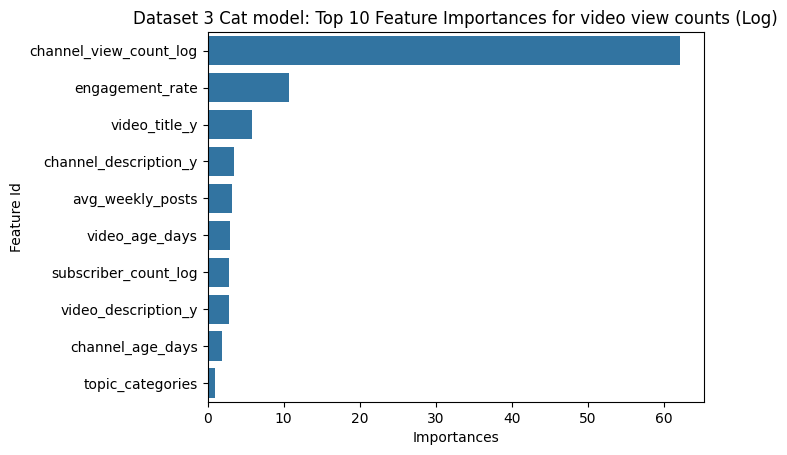

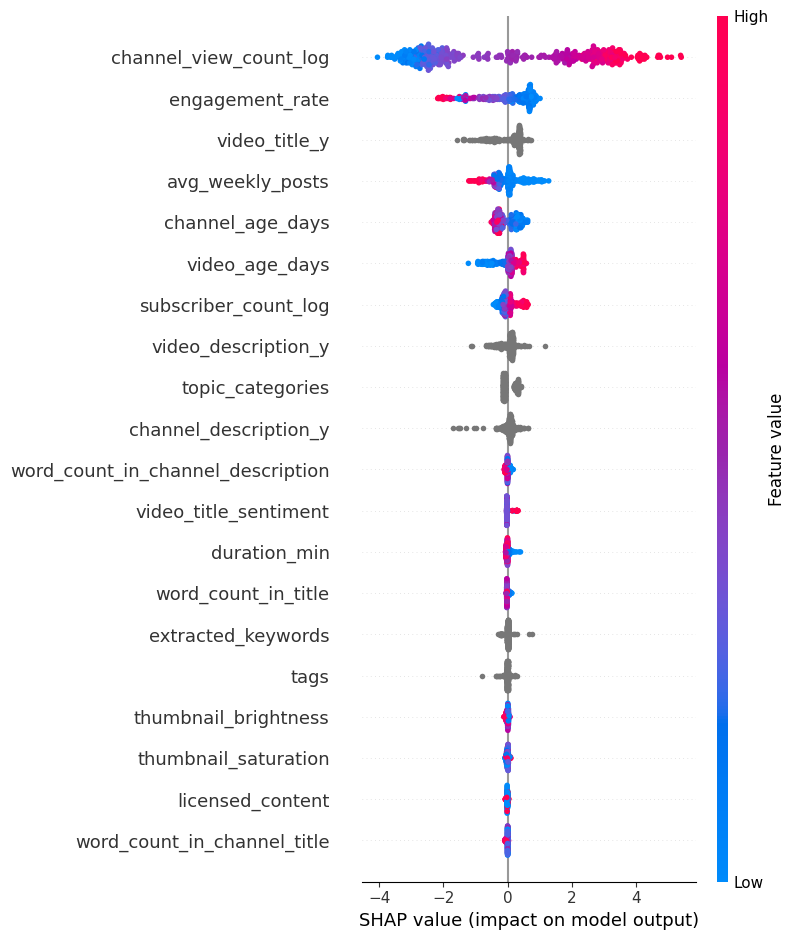

In [179]:
train_pool = Pool(data=X_train, label=y_train, cat_features=categorical_cols, text_features=text_cols)
test_pool = Pool(data=X_test, label=y_test,cat_features=categorical_cols, text_features=text_cols)
cat_model = CatBoostRegressor(iterations=500,
                             learning_rate=0.05,
                             depth=6,
                             eval_metric='R2',
                             l2_leaf_reg=8, 
                             random_seed=9,
                             logging_level='Silent',
                             early_stopping_rounds=50
                            
                        
                             )
cat_model.fit(train_pool, eval_set=test_pool, use_best_model=True)
y_train_pred = cat_model.predict(X_train)
y_test_pred = cat_model.predict(X_test)

# R² scores
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

y_test_real = np.expm1(y_test)
y_pred_real = np.expm1(y_test_pred)


mae = mean_absolute_error(y_test_real, y_pred_real)
mse = mean_squared_error(y_test_real, y_pred_real)
rmse = np.sqrt(mse) 
mape = np.mean(np.abs(y_test_real - y_pred_real) / y_test_real) * 100

# Log-scale metrics
mae_log = mean_absolute_error(np.log1p(y_test_real), np.log1p(y_pred_real))
rmse_log = np.sqrt(mean_squared_error(np.log1p(y_test_real), np.log1p(y_pred_real)))

# Median Absolute Percentage Error (MdAPE)
mdape = np.median(np.abs(y_test_real - y_pred_real) / (y_test_real + 1e-6)) * 100


print("R² Train:", r2_train)
print("R² Test:", r2_test)
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')  
print(f'MAPE: {mape:.2f}%')
print(f'MAE (log scale): {mae_log:.4f}')
print(f'RMSE (log scale): {rmse_log:.4f}')
print(f'MdAPE (%): {mdape:.2f}%')



feature_importance_df = cat_model.get_feature_importance(prettified=True)
feature_importance_df
feature_importance_df = feature_importance_df.sort_values(by='Importances', ascending=False)
sns.barplot(x='Importances', y='Feature Id', data=feature_importance_df.head(10) )
plt.title('Dataset 3 Cat model: Top 10 Feature Importances for video view counts (Log)')
plt.show()

shap_values = cat_model.get_feature_importance(type='ShapValues', data=test_pool)
shap.summary_plot(shap_values[:, :-1], X_test,title='Dataset3: SHAP Feature Importance for Video view counts')  




In [178]:
# Baseline: median predictor
median_views = np.median(np.expm1(y_train))  # convert back to original scale if log1p used
y_baseline_pred = np.full_like(y_test_real, fill_value=median_views, dtype=float)

# Baseline metrics
mae_baseline = mean_absolute_error(y_test_real, y_baseline_pred)
rmse_baseline = np.sqrt(mean_squared_error(y_test_real, y_baseline_pred))
mdape_baseline = np.median(np.abs(y_test_real - y_baseline_pred) / (y_test_real + 1e-6)) * 100

print("Baseline Metrics:")
print(f"MAE: {mae_baseline:.0f}")
print(f"RMSE: {rmse_baseline:.0f}")
print(f"MdAPE (%): {mdape_baseline:.2f}%")

Baseline Metrics:
MAE: 702663
RMSE: 3410259
MdAPE (%): 99.86%


In [180]:
bins = [0, 10000, 100000, np.inf]  # Low, Medium, High
y_test_cat = np.digitize(y_test_real, bins)
y_pred_cat = np.digitize(y_pred_real, bins)
accuracy = (y_test_cat == y_pred_cat).mean()
print(f'Binned accuracy: {accuracy:.2%}')


Binned accuracy: 81.70%


<Axes: xlabel='video_view_count', ylabel='Count'>

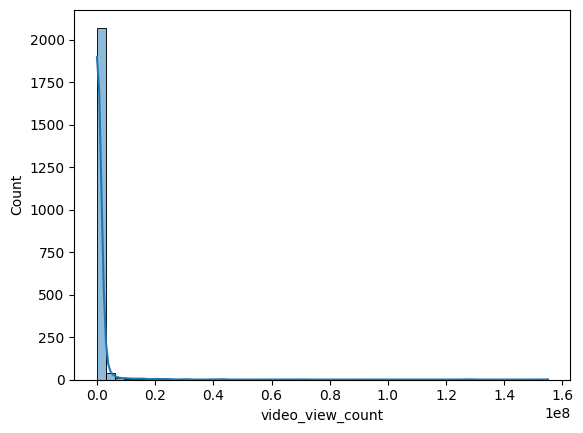

In [181]:
sns.histplot(dfo['video_view_count'], bins=50, kde=True)

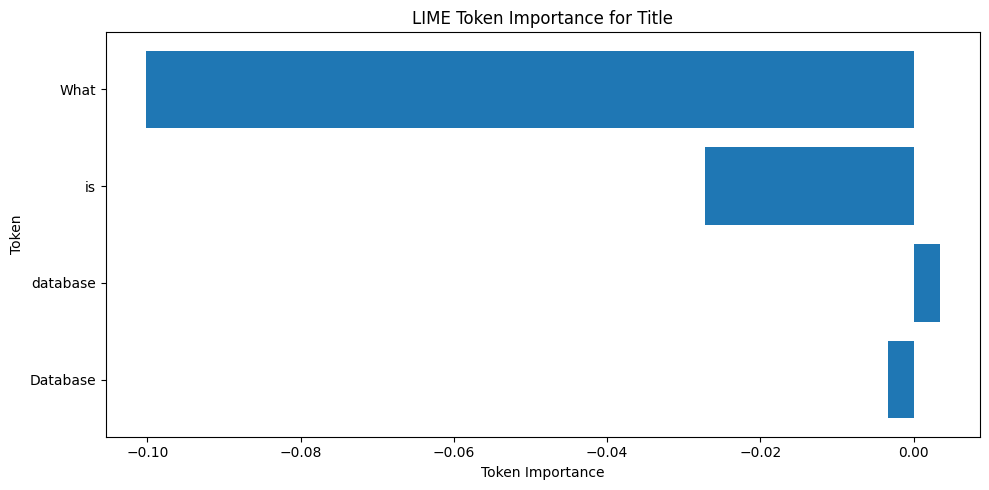

In [166]:
from lime.lime_text import LimeTextExplainer

i = 5
title_example = X_test['video_title_y'].iloc[i]

explainer = LimeTextExplainer()

exp = explainer.explain_instance(
    title_example,
    lambda titles_list: cat_model.predict(
        X_test.iloc[[i]*len(titles_list)].assign(video_title_y=titles_list)
    ).reshape(-1, 1), 
    labels=[0],         
    num_features=20
)

token_importance = exp.as_list(label=0)

exp.as_list(label=0)
tokens   = [t for t, v in token_importance]
weights  = [v for t, v in token_importance]

plt.figure(figsize=(10, 5))
plt.barh(tokens, weights)
plt.xlabel("Token Importance")
plt.ylabel("Token")
plt.title("LIME Token Importance for Title")
plt.gca().invert_yaxis()     # Largest at top
plt.tight_layout()
plt.show()


In [ ]:
from lime.lime_text import LimeTextExplainer
from collections import defaultdict
import numpy as np

explainer = LimeTextExplainer()
token_importance = defaultdict(list)

for i, title_example in enumerate(X_test['video_title_y'].fillna('')):
    exp = explainer.explain_instance(
        title_example,
        lambda titles_list: cat_model.predict(
            X_test.iloc[[i]*len(titles_list)].assign(video_title_y=titles_list)
        ).reshape(-1, 1),
        labels=[0],
        num_features=20
    )
    
    for token, weight in exp.as_list(label=0):
        token_importance[token].append(weight)

token_mean_shap = {t: np.mean(vals) for t, vals in token_importance.items()}

best_words  = {t: w for t, w in token_mean_shap.items() if w > 0}
worst_words = {t: w for t, w in token_mean_shap.items() if w < 0}

best_words  = dict(sorted(best_words.items(), key=lambda x: -x[1]))
worst_words = dict(sorted(worst_words.items(), key=lambda x: x[1]))

print("Top 10 Best Words:", list(best_words.items())[:10])
print("Top 10 Worst Words:", list(worst_words.items())[:10])


Top 10 Best Words: [(np.str_('HTML'), np.float64(0.3409165108125792)), (np.str_('Skills'), np.float64(0.26258636518444234)), (np.str_('animation'), np.float64(0.11481752205752804)), (np.str_('Roadmap'), np.float64(0.10944405434258597)), (np.str_('1st'), np.float64(0.0543062801217817)), (np.str_('ideas'), np.float64(0.04835525207996378)), (np.str_('Vision'), np.float64(0.04779738667425106)), (np.str_('Queue'), np.float64(0.04568613522606393)), (np.str_('Career'), np.float64(0.029621791935911707)), (np.str_('Designer'), np.float64(0.025590239204323476))]
Top 10 Worst Words: [(np.str_('difference'), np.float64(-1.0743881158432975)), (np.str_('Concept'), np.float64(-0.6900416643817817)), (np.str_('Concepts'), np.float64(-0.6329909041361328)), (np.str_('concept'), np.float64(-0.5538459413209676)), (np.str_('CONCEPT'), np.float64(-0.5273612148893093)), (np.str_('language'), np.float64(-0.30772267049169444)), (np.str_('Algorithm'), np.float64(-0.11551341480056684)), (np.str_('Code'), np.float

In [120]:
feature_importance_df.head(100)

,Feature Id,Importances
0,channel_view_count_log,62.053987
1,engagement_rate,10.743229
2,video_title_y,5.862554
3,channel_description_y,3.509397
4,avg_weekly_posts,3.152780
5,video_age_days,2.967973
6,subscriber_count_log,2.847526
7,video_description_y,2.816460
8,channel_age_days,1.939256
9,topic_categories,0.957976


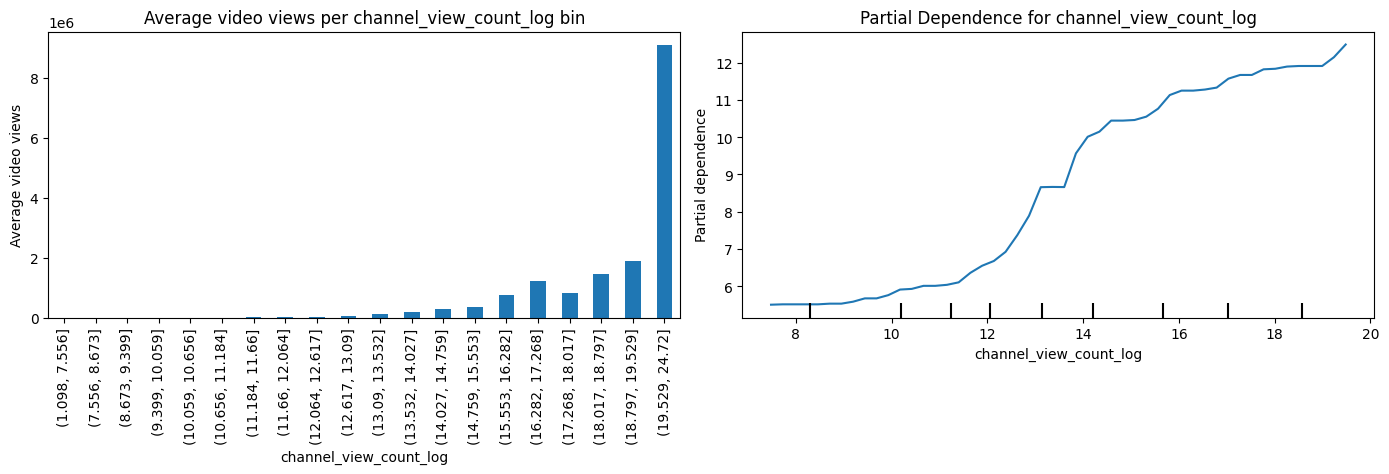

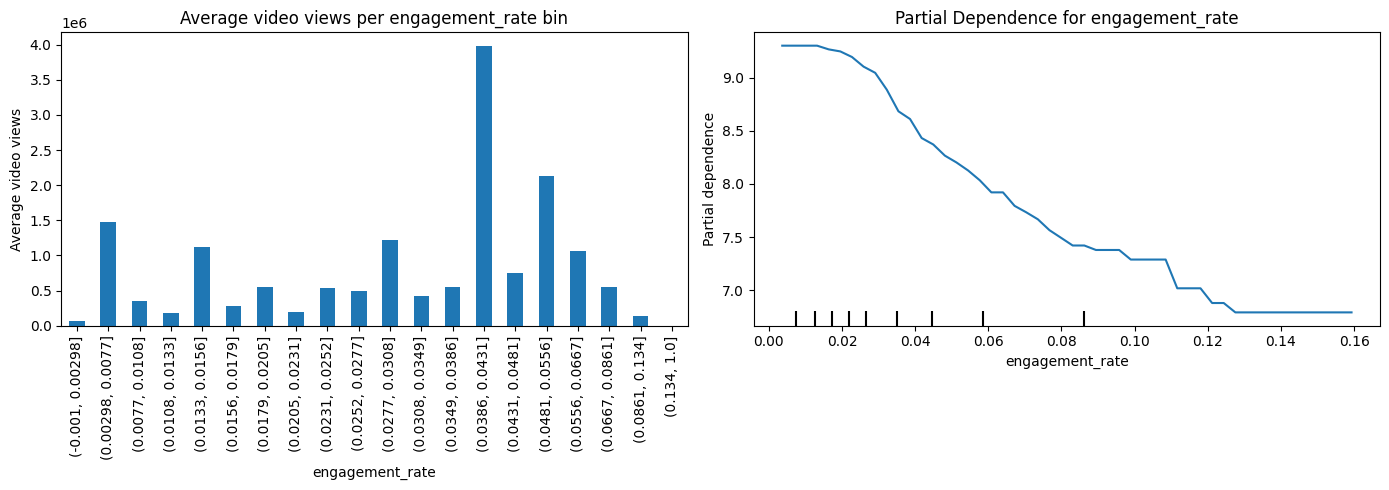

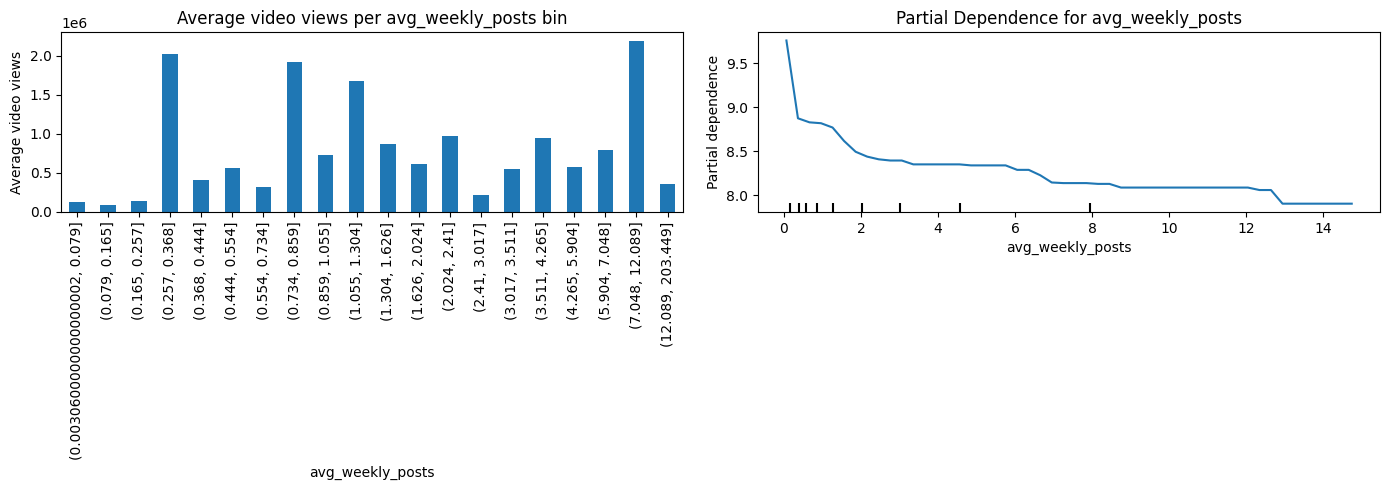

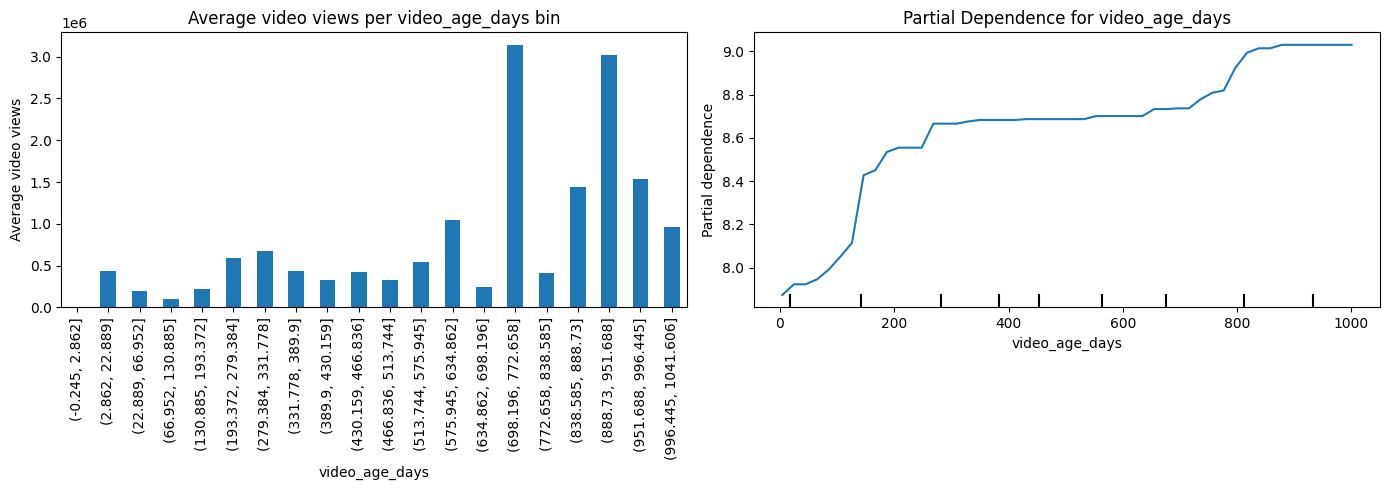

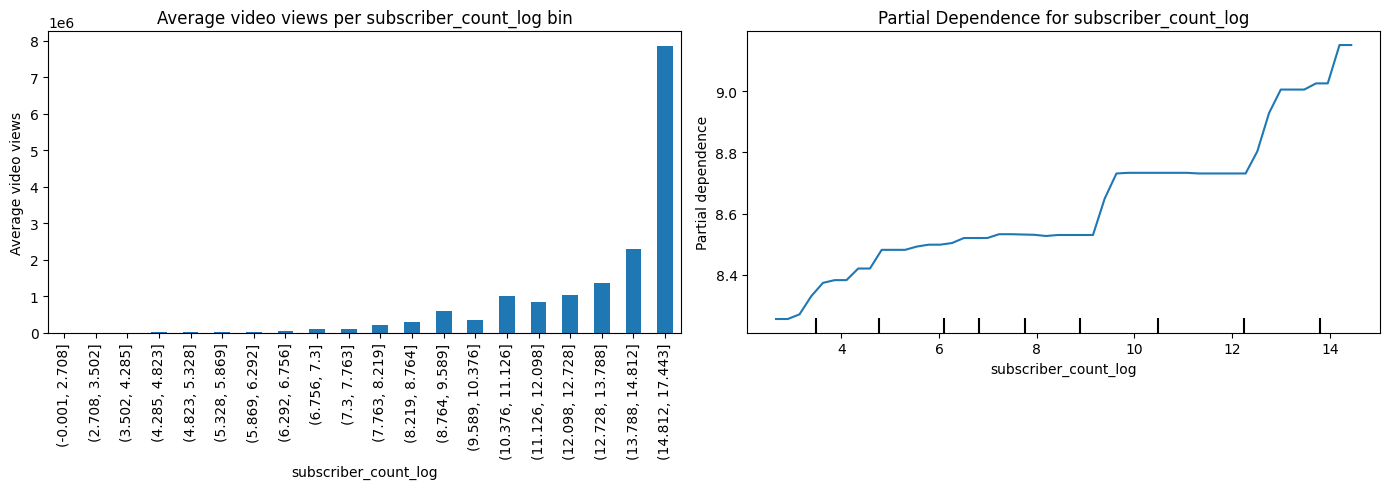

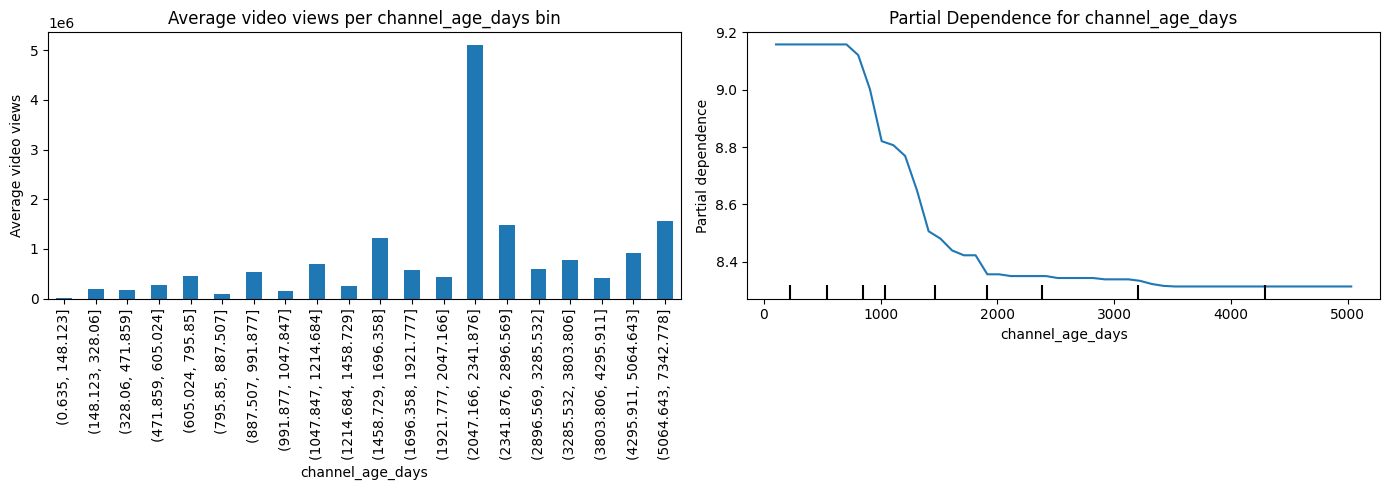

In [ ]:

from sklearn.inspection import PartialDependenceDisplay

top_10_features = feature_importance_df['Feature Id'].head(10)
top_10_numeric_features = [feature for feature in top_10_features if np.issubdtype(df[feature].dtype, np.number)]
for feature in top_10_numeric_features:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))  # 1 row, 2 columns

    df[f'{feature}_bin'] = pd.qcut(df[feature], q=20, duplicates='drop')
    avg_values = df.groupby(f'{feature}_bin')['video_view_count'].mean()
    avg_values.plot(kind='bar', ax=axes[0])
    axes[0].set_title(f"Average video views per {feature} bin")
    axes[0].set_ylabel('Average video views')
    axes[0].set_xlabel(feature)

    PartialDependenceDisplay.from_estimator(
        cat_model, X_test, [feature], ax=axes[1], grid_resolution=50
    )
    axes[1].set_title(f"Partial Dependence for {feature}")

    plt.tight_layout()
    plt.show()


In [60]:
df = df_model.copy()

In [61]:
df = normalize_text_columns(df, text_columns = ['video_title_y'],function=normalize_text)

In [62]:
df = normalize_text_columns(df, text_columns = ['video_title_y'],function=additional_normalize_text)

In [63]:
df = normalize_text_columns(df, text_columns = ['video_title_y'],function=spcay_text)

In [64]:
df['video_title_y'][0]

'data structure vs algorithm explain in 30 second simple beginner guide short dsa'

In [68]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
import numpy as np

X = df['video_title_y'].fillna('')
y = df_output['video_view_count_log']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

tfidf = TfidfVectorizer(
    stop_words='english',
    ngram_range=(1,2),          
    min_df=5
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf  = tfidf.transform(X_test)

model = Ridge(alpha=1.0)
model.fit(X_train_tfidf, y_train)

feature_names = np.array(tfidf.get_feature_names_out())
coefficients  = model.coef_

top_positive_idx = coefficients.argsort()[::-1][:30]  
top_negative_idx = coefficients.argsort()[:30]       

print("Best words")
for i in top_positive_idx:
    print(f"{feature_names[i]:20s}  +{coefficients[i]:.3f}")

print("Worst words")
for i in top_negative_idx:
    print(f"{feature_names[i]:20s}  {coefficients[i]:.3f}")


Best words
html css              +4.257
paper                 +4.017
short viral           +3.654
fast                  +3.587
roadmap               +3.494
project               +3.205
good                  +2.959
window                +2.941
powerpoint            +2.929
science project       +2.907
career                +2.770
start                 +2.761
computer computer     +2.744
kya                   +2.657
engineer              +2.640
salary                +2.591
create                +2.486
data scientist        +2.445
machine learn         +2.445
simplilearn           +2.385
choose                +2.367
java programming      +2.331
interview question    +2.160
ai tool               +2.097
cod interview         +2.074
list                  +2.053
vs                    +2.015
leetcode              +2.000
minute                +1.915
intellipaat           +1.882
Worst words
concept               -8.697
fact                  -5.743
java explain          -5.058
programminglanguage 

In [70]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
import numpy as np


X = df['video_title_y'].fillna('')
y = df_output['video_view_count_log']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)
tfidf = TfidfVectorizer(
    stop_words='english',
    ngram_range=(1,2),          
    min_df=5                    
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf  = tfidf.transform(X_test)


lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_tfidf, y_train)

feature_names = np.array(tfidf.get_feature_names_out())
coefficients  = lasso_model.coef_

top_positive_idx = coefficients.argsort()[::-1][:30]  
top_negative_idx = coefficients.argsort()[:30]       

print("Best words")
for i in top_positive_idx:
    print(f"{feature_names[i]:20s}  +{coefficients[i]:.3f}")

print("Worst words")
for i in top_negative_idx:
    print(f"{feature_names[i]:20s}  {coefficients[i]:.3f}")


Best words
ytshort               +0.000
dsa algorithm         +-0.000
datum type            +-0.000
day                   +-0.000
definition            +-0.000
demonstrate           +-0.000
demonstrate concept   +-0.000
design                +-0.000
developer             +0.000
development           +0.000
difference            +0.000
division              +-0.000
diy                   +0.000
dsa                   +-0.000
dsa datastructure     +-0.000
explain concept       +-0.000
easy                  +0.000
education             +-0.000
electronic            +0.000
encapsulation         +-0.000
engineer              +0.000
engineering           +0.000
essential             +0.000
etl                   +-0.000
evolution             +-0.000
exam                  +-0.000
example               +-0.000
explain               +-0.000
datum structure       +-0.000
datum scientist       +0.000
Worst words
concept               -5.747
10                    0.000
presentation          0.000
pre